In [1]:
import math, keras
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, GlobalAveragePooling2D, GlobalMaxPooling2D

# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.applications.mobilenet import MobileNet
# from tensorflow.keras.applications.resnet_rs import ResNetRS420
# from tensorflow.keras.applications.resnet_v2 import ResNet50V2
# from tensorflow.keras.applications.vgg19 import VGG19
# from tensorflow.keras.applications.nasnet import NASNetLarge
# from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
# from tensorflow.keras.applications.xception import Xception
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.applications.densenet import DenseNet169
# from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras.applications.convnext import ConvNeXtXLarge

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Каталог с данными для обучения
train_dir = 'DATASET-coco/train'
# Каталог с данными для проверки
val_dir = 'DATASET-coco/validation'
# Каталог с данными для тестирования
test_dir = 'DATASET-coco/test'
# Размеры изображения
img_width, img_height = 224, 224
# Размер мини-выборки
batch_size = 64
# число классов
num_classes = 2

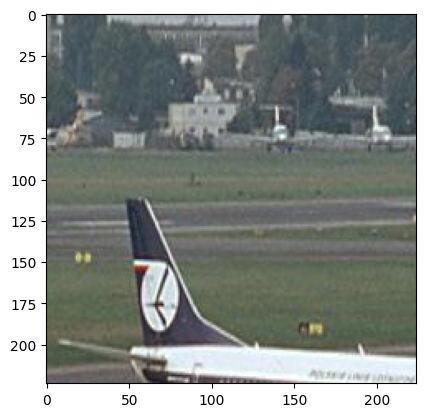

In [3]:
image_file_name = test_dir + '/1/137.jpg' # with watermark
img = Image.open(image_file_name)
plt.imshow(img)

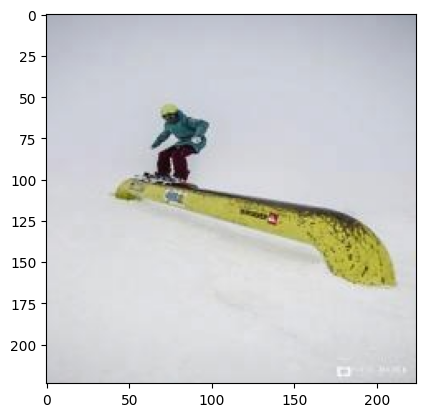

In [8]:
image_file_name = train_dir + '/1/52.jpeg' # with watermark
img = Image.open(image_file_name)
plt.imshow(img)

In [9]:
train_datagen = ImageDataGenerator()#(rescale=1. / 255)#, featurewise_center=True, featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 74040 images belonging to 2 classes.


In [10]:
test_datagen = ImageDataGenerator()#(rescale=1. / 255)#, featurewise_center=True, featurewise_std_normalization=True)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24680 images belonging to 2 classes.


In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 24700 images belonging to 2 classes.


In [12]:
def model_maker(activation):
    # base_model = ResNet50(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = MobileNet(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = ResNetRS420(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = ResNet50V2(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = VGG19(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = NASNetLarge(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = InceptionResNetV2(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = Xception(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = InceptionV3(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = DenseNet169(include_top=False, input_shape = (img_width, img_height, 3))
    # base_model = EfficientNetV2S(include_top=False, input_shape = (img_width, img_height, 3))
    base_model = ConvNeXtXLarge(include_top=False, input_shape = (img_width, img_height, 3))
    
    for layer in base_model.layers[:]:
        layer.trainable = False # Freeze the layers
        
    input = Input(shape=(img_width, img_height, 3))
    custom_model = base_model(input)
    custom_model = GlobalAveragePooling2D()(custom_model) # GlobalMaxPooling2D()(custom_model)
    custom_model = Dense(64, activation='relu')(custom_model)
    custom_model = Dropout(0.5)(custom_model)
    predictions = Dense(num_classes, activation=activation)(custom_model) # activation = 'sigmoid', activation = 'softmax'
    return Model(inputs=input, outputs=predictions)

In [13]:
model = model_maker('sigmoid') #softmax

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convnext_xlarge (Functional)         │ (None, 7, 7, 2048)          │     348,147,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 348,279,234 (1.30 GB)

 Trainable params: 131,266 (512.76 KB)

 Non-trainable params: 348,147,968 (1.30 GB)

In [14]:
from keras import metrics

#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label. 
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=[metrics.mae, metrics.categorical_accuracy])
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy', # 'categorical_crossentropy',
              metrics=['accuracy',
                                                                                                             metrics.TruePositives(),
                                                                                                             metrics.TrueNegatives(),
                                                                                                            metrics.FalsePositives(),
                                                                                                            metrics.FalseNegatives()])

In [15]:
# Обучаем модель с использованием генераторов
# train_generator - генератор данных для обучения
# validation_data - генератор данных для проверки

# Need to run with real data to infer shape of different layers
history = model.fit(train_generator,
    steps_per_epoch=6,
    epochs=200,
    validation_data=val_generator,
    validation_steps=1)

Epoch 1/200


C:\Users\Peter\Desktop\2class\CLASS2\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 910s 153s/step - accuracy: 0.5644 - false_negatives: 112.0000 - false_positives: 115.5714 - loss: 0.7607 - true_negatives: 131.2857 - true_positives: 134.8571 - val_accuracy: 0.5625 - val_false_negatives: 31.0000 - val_false_positives: 25.0000 - val_loss: 0.6914 - val_true_negatives: 39.0000 - val_true_positives: 33.0000
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 890s 155s/step - accuracy: 0.4808 - false_negatives: 118.8571 - false_positives: 121.7143 - loss: 0.7679 - true_negatives: 125.1429 - true_positives: 128.0000 - val_accuracy: 0.5000 - val_false_negatives: 24.0000 - val_false_positives: 38.0000 - val_loss: 0.7042 - val_true_negatives: 26.0000 - val_true_positives: 40.0000
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 885s 150s/step - accuracy: 0.5273 - false_negatives: 112.0000 - false_positives: 139.1429 - loss: 0.7327 - true_negatives: 107.7143 - true_positives: 134.8571 - val_accuracy: 0.5781 - val_false_negatives: 28.0000 - val_false_positives: 30.0000 - val_loss:

C:\Users\Peter\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


6/6 ━━━━━━━━━━━━━━━━━━━━ 726s 121s/step - accuracy: 0.8763 - false_negatives: 25.8333 - false_positives: 25.5000 - loss: 0.2918 - true_negatives: 187.8333 - true_positives: 187.5000 - val_accuracy: 0.8125 - val_false_negatives: 14.0000 - val_false_positives: 12.0000 - val_loss: 0.3825 - val_true_negatives: 52.0000 - val_true_positives: 50.0000
Epoch 194/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 874s 148s/step - accuracy: 0.8679 - false_negatives: 31.4286 - false_positives: 32.0000 - loss: 0.3206 - true_negatives: 214.8571 - true_positives: 215.4286 - val_accuracy: 0.8438 - val_false_negatives: 10.0000 - val_false_positives: 9.0000 - val_loss: 0.3345 - val_true_negatives: 55.0000 - val_true_positives: 54.0000
Epoch 195/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 895s 155s/step - accuracy: 0.8378 - false_negatives: 38.5714 - false_positives: 37.1429 - loss: 0.3294 - true_negatives: 209.7143 - true_positives: 208.2857 - val_accuracy: 0.8438 - val_false_negatives: 10.0000 - val_false_positives: 10.0000 - val_loss: 0.

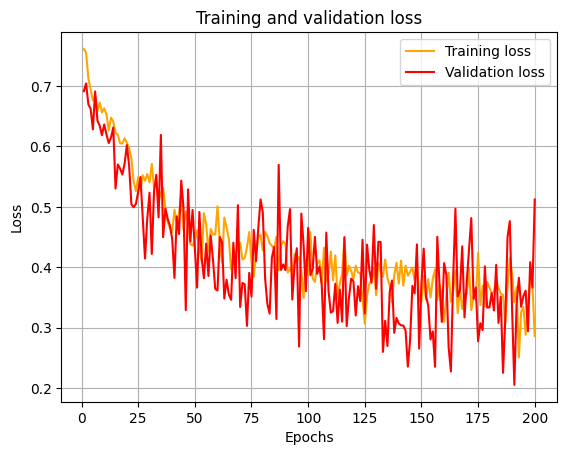

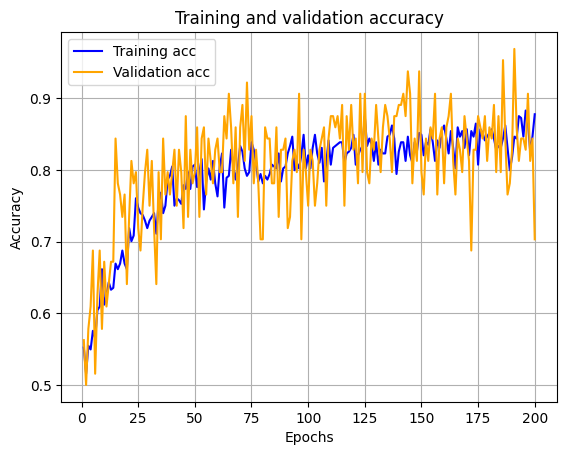

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'orange', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig('loss-unnorm-cocowm-200epochs-partlevelwm.png')
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'blue', label='Training acc')
plt.plot(epochs, val_acc, 'orange', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.savefig('acc-unnorm-cocowm-200epochs-partlevelwm.png')
plt.show()

In [17]:
scores = model.evaluate(test_generator)
# print(f"\nТочность на тестовых данных: {(scores[1]*100):.2f}%")

386/386 ━━━━━━━━━━━━━━━━━━━━ 47889s 124s/step - accuracy: 0.6581 - false_negatives: 4251.1914 - false_positives: 4325.0312 - loss: 0.9467 - true_negatives: 8090.7827 - true_positives: 8164.6226


In [18]:
print(model.metrics_names)
print(scores)

['loss', 'compile_metrics']
[0.9456852674484253, 0.6529959440231323, 8495.0, 8642.0, 16058.0, 16205.0]


In [19]:
from math import sqrt
mcc = (scores[-4]*scores[-3] - scores[-2]*scores[-1])/sqrt((scores[-4]+scores[-2])*(scores[-4]+scores[-1])*(scores[-3]+scores[-2])*(scores[-3]+scores[-1]))
print(f'Коэффициент корреляции Мэтьюса = {mcc}')

Коэффициент корреляции Мэтьюса = -0.30619975473216293


In [20]:
model.save('pretrained-classificator-wm-coco.keras')

In [ ]:
model = keras.models.load_model("pretrained-classificator-wm-coco.keras")
print("Loaded model from disk")

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy', # 'categorical_crossentropy',
              metrics=['accuracy', metrics.TruePositives(), metrics.TrueNegatives(), metrics.FalsePositives(), metrics.FalseNegatives()])

test_dir = 'DATASET-coco/test'
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical')


In [ ]:
scores = model.evaluate(test_generator)
print(model.metrics_names)
print(scores)

from math import sqrt
mcc = (scores[-4]*scores[-3] - scores[-2]*scores[-1])/sqrt((scores[-4]+scores[-2])*(scores[-4]+scores[-1])*(scores[-3]+scores[-2])*(scores[-3]+scores[-1]))
print(f'Коэффициент корреляции Мэтьюса = {mcc}')